<a href="https://colab.research.google.com/github/Hangowoon/Newjak_ex/blob/main/b_customLoad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#커스텀 형태 데이터셋 로딩


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from PIL import Image

###1) train 데이터로 불러올 폴더 지정

In [16]:
imgsize = 128
img_dir = "drive/MyDrive/Colab Notebooks/my_newfloder/train1/"

In [18]:
"""
폴더에서 클래스 관련 정보 추출
- classes : 클래스 이름(=폴더명)
- class_to_idx : {클래스 이름 : 인텍스} 쌍
- lenght : 폴더 내 모든 이미지 개수
- total_file_list :  모든 이미지 파일의 경로 list 
- total_label : 모든 이미지의 라벨 리스트
"""

'\n폴더에서 클래스 관련 정보 추출\n- classes : 클래스 이름(=폴더명)\n- class_to_idx : {클래스 이름 : 인텍스} 쌍\n- lenght : 폴더 내 모든 이미지 개수\n- total_file_list :  모든 이미지 파일의 경로 list \n- total_label : 모든 이미지의 라벨 리스트\n'

In [19]:
import os

def MyGetInfoFromFloder(ipath):
  classes = sorted(os.listdir(ipath))
  class_to_idx = {}
  length = 0
  total_file_list = []
  total_label = []

  for i, c in enumerate(classes):
    class_to_idx.update({c: i})

    file_list = sorted(os.listdir(ipath + "/" + c))
    length += len(file_list)

    for f in file_list: 
      total_file_list.append(ipath + c + "/" + f)
      total_label.append(i)

  return classes, class_to_idx, length, total_file_list, total_label

In [20]:
classes, class_to_idx, lenght, total_file_list, total_label = MyGetInfoFromFloder(img_dir)
print(classes)
print(class_to_idx)
print(lenght)
print(total_file_list[1])
print(total_label[0])

['3F', '5F', '7F']
{'3F': 0, '5F': 1, '7F': 2}
40
drive/MyDrive/Colab Notebooks/my_newfloder/train1/3F/3F_002.jpg
0


In [21]:
"""
*Custumized dataset
폴더의 영상을 가져올수 있는 클래스의 객체 

*입력 변수
ipath : 데이터가 들어있는 경로
imgsize : 기준이 되는 imgsize

*클래스 : Dataset_foler
"""

'\n*Custumized dataset\n폴더의 영상을 가져올수 있는 클래스의 객체 \n\n*입력 변수\nipath : 데이터가 들어있는 경로\nimgsize : 기준이 되는 imgsize\n\n*클래스 : Dataset_foler\n'

In [48]:
class MyImageFolder(Dataset):
  def __init__(self, ipath, 
               transform = transforms.ToTensor()):
    self.classes, self.class_to_idx, self.length, self.flist, self.labels = MyGetInfoFromFloder(ipath)
    self.root_dir = ipath
    self.transform = transform

  def __len__(self):
    return self.length

  def __getitem__(self, idx):
    img = Image.open(self.flist[idx])

    if(img.mode != "RGB"):
      img = img.convert(mode = "RGB")

    img = self.transform(img)

    label = self.labels[idx]

    return img, label

In [49]:
# Dataset_folder 호출 테스트

my_train = MyImageFolder(img_dir, 
                         transforms.Compose([transforms.Resize((imgsize, imgsize)),
                         transforms.ToTensor()]
                         ))

### 2) train 데이터 정보 출력

In [50]:
nclass = len(my_train.classes)
print("# of classes(클래스 개수): %d" %nclass)
print("클래스 이름:", my_train.classes)
print("클래스별 인덱스:", my_train.class_to_idx)
print("my_train 개수:", len(my_train))  # my_train.__len__()

# of classes(클래스 개수): 3
클래스 이름: ['3F', '5F', '7F']
클래스별 인덱스: {'3F': 0, '5F': 1, '7F': 2}
my_train 개수: 60


### 2) train 데이터 그리기

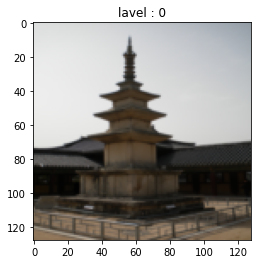

torch.Size([128, 128, 3])


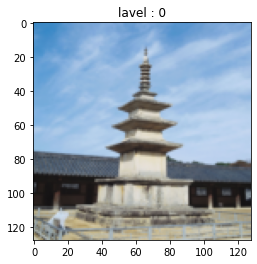

torch.Size([128, 128, 3])


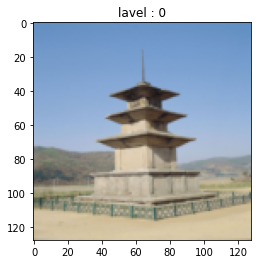

torch.Size([128, 128, 3])


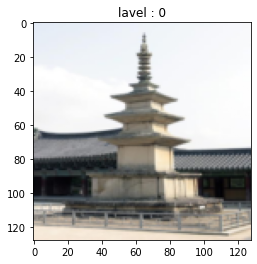

torch.Size([128, 128, 3])


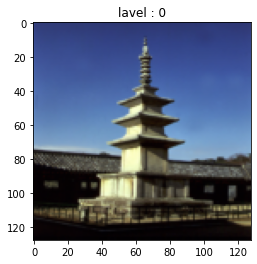

torch.Size([128, 128, 3])


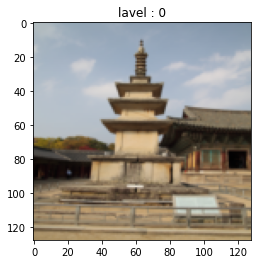

torch.Size([128, 128, 3])


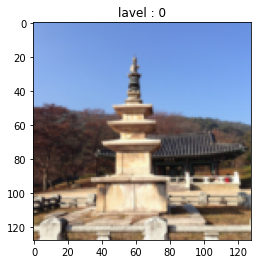

torch.Size([128, 128, 3])


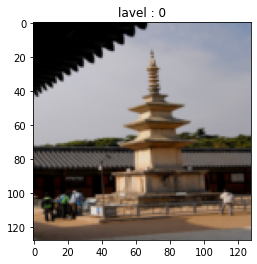

torch.Size([128, 128, 3])


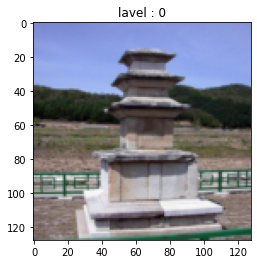

torch.Size([128, 128, 3])


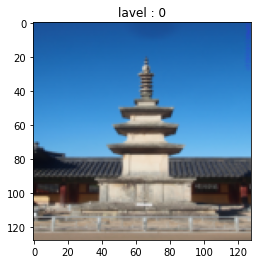

torch.Size([128, 128, 3])


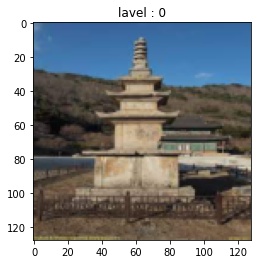

torch.Size([128, 128, 3])


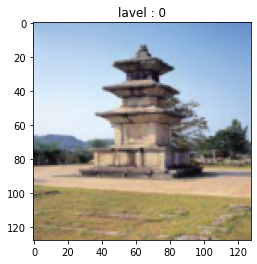

torch.Size([128, 128, 3])


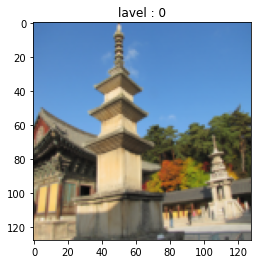

torch.Size([128, 128, 3])


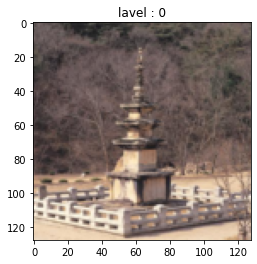

torch.Size([128, 128, 3])


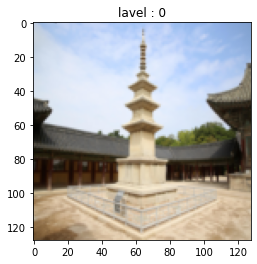

torch.Size([128, 128, 3])


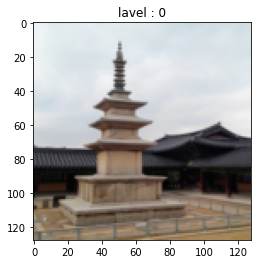

torch.Size([128, 128, 3])


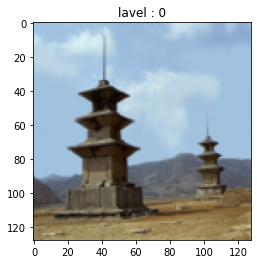

torch.Size([128, 128, 3])


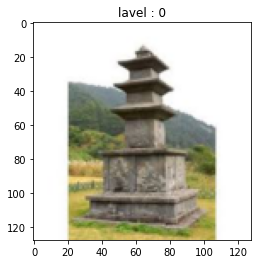

torch.Size([128, 128, 3])


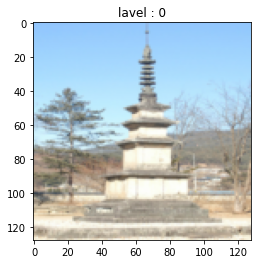

torch.Size([128, 128, 3])


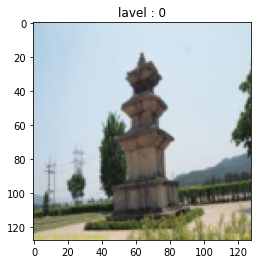

torch.Size([128, 128, 3])


In [52]:
for i in range(20):
  img = my_train[i][0] # my_train.__getitem__(i)
  img = np.transpose(img, (1,2,0))

  plt.title("lavel : %d" %my_train[i][1]) 
  plt.imshow(img)
  plt.show()

  print(img.shape) #print(img.size)

### 3) 데이터 로드하기

In [64]:
batch_size = 4

In [65]:
train_loader = data.DataLoader(my_train, 
                               batch_size = batch_size, 
                               shuffle = True, #섞음
                               num_workers=2,  #코어 개수
                               drop_last = True) #나머지 버림

[0]
한번에 로드되는 데이터 크기: 4
torch.Size([4, 3, 128, 128])
torch.Size([4])


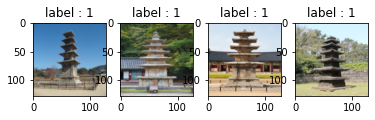

[1]
한번에 로드되는 데이터 크기: 4
torch.Size([4, 3, 128, 128])
torch.Size([4])


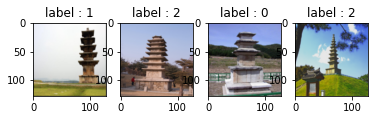

[2]
한번에 로드되는 데이터 크기: 4
torch.Size([4, 3, 128, 128])
torch.Size([4])


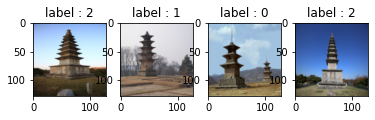

[3]
한번에 로드되는 데이터 크기: 4
torch.Size([4, 3, 128, 128])
torch.Size([4])


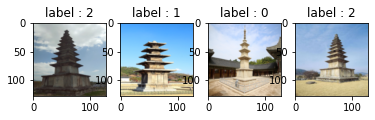

[4]
한번에 로드되는 데이터 크기: 4
torch.Size([4, 3, 128, 128])
torch.Size([4])


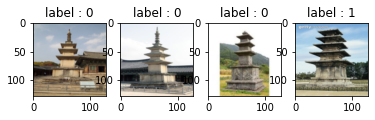

[5]
한번에 로드되는 데이터 크기: 4
torch.Size([4, 3, 128, 128])
torch.Size([4])


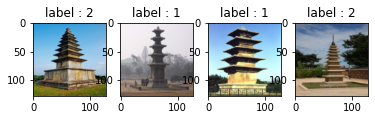

In [71]:
n = 4  #샘플 수
for i, [imgs, labels] in enumerate(train_loader):
  if i>5:
    break

  print ("[%d]" %i)
  print ("한번에 로드되는 데이터 크기:", len(imgs))

  # GPU에 로드 
  x = Variable(imgs) #.cuda()  #(batch_size, 3, 28, 28)
  y_ = Variable(labels) #.cuda()  #(batch_size)

  print(x.shape)
  print(y_.shape)

  for j in range(n):
    img = imgs[j].numpy()
    img = np.transpose(img, (1,2,0))

    plt.subplot(1, n, j+1)
    plt.imshow(img)
    plt.title("label : %d" %labels[j])
  plt.show()

In [ ]:
# (최대한 크게)이미지 정사각으로 자르기 함수 
